# **การดึงข้อมูลตลาดหุ้น ที่มีหุ้นหลายๆตัวพร้อมกัน และจัดทำ multi level index**

เริ่มจากการ install yfinance

In [1]:
#คำสั่งสำหรับการ install yfinance


จากนั้น เข้าไปดู ticker ในเว็บไซต์ yahoofinance.com
แล้วทำการ download ข้อมูลมาเก็บไว้เป็นไฟล์ .csv

In [2]:
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as web # ไลบรารีที่เราจะใช้ดึงข้อมูลหุ้น
import datetime as dt # ไลบรารีที่เราจะใช้สำหรับงานที่เกี่ยวข้องกับ วันเวลา
import pandas as pd # ไลบรารีที่เราจะใช้ทำงานเกี่ยวกับตาราง (Dataframe)
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina' #กำหนดรูปกราฟเป็นความละเอียดสูง

# ดึงข้อมูลหุ้นหลายๆตัวพร้อมกัน
**การเรียกข้อมูลแบบ multilevel column names**

In [3]:
stocks=['EA.BK', 'AOT.BK', 'SCB.BK'] #ดึงหุ้นไทยมากกว่า 1 ตัว
df2 = web.get_data_yahoo(stocks, start="2022-05-01")
df2.head()

[*********************100%%**********************]  3 of 3 completed


Adj Close                         Close                 High  \
              AOT.BK      EA.BK      SCB.BK AOT.BK  EA.BK SCB.BK AOT.BK   
Date                                                                      
2022-05-03     67.25  86.911163  110.100540  67.25  87.25  117.5  67.50   
2022-05-05     67.25  86.662140  108.226486  67.25  87.00  115.5  68.00   
2022-05-06     66.50  84.918930  106.352440  66.50  85.25  113.5  67.00   
2022-05-09     66.25  82.677673  103.541359  66.25  83.00  110.5  66.75   
2022-05-10     67.00  83.175728  105.883926  67.00  83.50  113.0  67.25   

                            Low                 Open                  Volume  \
            EA.BK SCB.BK AOT.BK  EA.BK SCB.BK AOT.BK  EA.BK SCB.BK    AOT.BK   
Date                                                                           
2022-05-03  88.25  118.5   66.5  87.25  113.5   67.0  88.25  115.0  17881500   
2022-05-05  89.25  119.0   67.0  87.00  115.5   68.0  88.00  119.0  24039900   
2022-05-06  86.50  114.5   66.0  83.50  113.0   66.5  86.00  114.0  26710700   
2022-05-09  84.75  113.0   66.0  82.50  110.0   66.5  83.75  112.5  22699300   
2022-05-10  84.00  113.0   66.0  82.50  110.0   66.5  83.00  110.5  25902400   

                                
               EA.BK    SCB.BK  
Date                            
2022-05-03   8201000  26009800  
2022-05-05  13310900  14300200  
2022-05-06  23202100  18610000  
2022-05-09  13812800  20008500  
2022-05-10  13198900  19690000

In [4]:
df2.tail()

Adj Close                Close                 High                \
              AOT.BK  EA.BK SCB.BK AOT.BK  EA.BK SCB.BK AOT.BK  EA.BK SCB.BK   
Date                                                                           
2023-09-06     71.75  61.75  116.5  71.75  61.75  116.5  72.25  62.25  117.5   
2023-09-07     71.75  60.75  116.0  71.75  60.75  116.0  72.25  61.75  117.0   
2023-09-08     71.00  60.75  116.0  71.00  60.75  116.0  72.00  61.50  116.5   
2023-09-11     71.25  61.25  116.0  71.25  61.25  116.0  71.50  61.50  116.5   
2023-09-12     71.50  61.75  116.5  71.50  61.75  116.5  71.75  62.50  116.5   

              Low                 Open                  Volume            \
           AOT.BK  EA.BK SCB.BK AOT.BK  EA.BK SCB.BK    AOT.BK     EA.BK   
Date                                                                       
2023-09-06  71.25  61.50  115.5  72.00  61.75  116.5  16864600   8847500   
2023-09-07  71.50  60.00  115.5  71.75  61.50  116.5   9328300  14538000   
2023-09-08  71.00  60.75  115.5  71.75  61.00  116.5  14717400   5525200   
2023-09-11  70.50  60.25  115.5  71.00  61.00  116.0  15233000   9372100   
2023-09-12  71.25  61.25  115.5  71.50  62.25  116.0   2439293   8405076   

                      
              SCB.BK  
Date                  
2023-09-06  17327800  
2023-09-07   6584800  
2023-09-08  12202000  
2023-09-11   5567400  
2023-09-12   6549695

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 332 entries, 2022-05-03 to 2023-09-12
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, AOT.BK)  332 non-null    float64
 1   (Adj Close, EA.BK)   332 non-null    float64
 2   (Adj Close, SCB.BK)  332 non-null    float64
 3   (Close, AOT.BK)      332 non-null    float64
 4   (Close, EA.BK)       332 non-null    float64
 5   (Close, SCB.BK)      332 non-null    float64
 6   (High, AOT.BK)       332 non-null    float64
 7   (High, EA.BK)        332 non-null    float64
 8   (High, SCB.BK)       332 non-null    float64
 9   (Low, AOT.BK)        332 non-null    float64
 10  (Low, EA.BK)         332 non-null    float64
 11  (Low, SCB.BK)        332 non-null    float64
 12  (Open, AOT.BK)       332 non-null    float64
 13  (Open, EA.BK)        332 non-null    float64
 14  (Open, SCB.BK)       332 non-null    float64
 15  (Volume, AOT.BK)     

In [6]:
df2.index

DatetimeIndex(['2022-05-03', '2022-05-05', '2022-05-06', '2022-05-09',
               '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
               '2022-05-17', '2022-05-18',
               ...
               '2023-08-30', '2023-08-31', '2023-09-01', '2023-09-04',
               '2023-09-05', '2023-09-06', '2023-09-07', '2023-09-08',
               '2023-09-11', '2023-09-12'],
              dtype='datetime64[ns]', name='Date', length=332, freq=None)

In [7]:
df2.columns

MultiIndex([('Adj Close', 'AOT.BK'),
            ('Adj Close',  'EA.BK'),
            ('Adj Close', 'SCB.BK'),
            (    'Close', 'AOT.BK'),
            (    'Close',  'EA.BK'),
            (    'Close', 'SCB.BK'),
            (     'High', 'AOT.BK'),
            (     'High',  'EA.BK'),
            (     'High', 'SCB.BK'),
            (      'Low', 'AOT.BK'),
            (      'Low',  'EA.BK'),
            (      'Low', 'SCB.BK'),
            (     'Open', 'AOT.BK'),
            (     'Open',  'EA.BK'),
            (     'Open', 'SCB.BK'),
            (   'Volume', 'AOT.BK'),
            (   'Volume',  'EA.BK'),
            (   'Volume', 'SCB.BK')],
           )

ดูข้อมูลค่า High ของทุกหุ้น

In [8]:
df2['High'].head()

,AOT.BK,EA.BK,SCB.BK
Date,,,
2022-05-03,67.50,88.25,118.5
2022-05-05,68.00,89.25,119.0
2022-05-06,67.00,86.50,114.5
2022-05-09,66.75,84.75,113.0
2022-05-10,67.25,84.00,113.0


ดูข้อมูลค่า High ของหุ้น 'EA'

In [9]:
df2['High']['EA.BK'].head()

Date
2022-05-03    88.25
2022-05-05    89.25
2022-05-06    86.50
2022-05-09    84.75
2022-05-10    84.00
Name: EA.BK, dtype: float64

ดูข้อมูลตั้งแต่วันที่ต้องการ ทุกคอลัมน์

In [11]:
df2.loc['2022-08-15':] # ตั้งแต่วันที่ 15 เป็นต้นไป

Adj Close                         Close                 High  \
              AOT.BK      EA.BK      SCB.BK AOT.BK  EA.BK SCB.BK AOT.BK   
Date                                                                      
2022-08-15     72.50  85.666023   99.324745  72.50  86.00  106.0  72.75   
2022-08-16     71.50  83.424759   99.324745  71.50  83.75  106.0  72.50   
2022-08-17     72.00  82.677673  101.198792  72.00  83.00  108.0  72.00   
2022-08-18     72.00  82.677673  101.198792  72.00  83.00  108.0  72.25   
2022-08-19     72.00  82.926697   98.387718  72.00  83.25  105.0  72.25   
...              ...        ...         ...    ...    ...    ...    ...   
2023-09-06     71.75  61.750000  116.500000  71.75  61.75  116.5  72.25   
2023-09-07     71.75  60.750000  116.000000  71.75  60.75  116.0  72.25   
2023-09-08     71.00  60.750000  116.000000  71.00  60.75  116.0  72.00   
2023-09-11     71.25  61.250000  116.000000  71.25  61.25  116.0  71.50   
2023-09-12     71.50  61.750000  116.500000  71.50  61.75  116.5  71.75   

                            Low                 Open                  Volume  \
            EA.BK SCB.BK AOT.BK  EA.BK SCB.BK AOT.BK  EA.BK SCB.BK    AOT.BK   
Date                                                                           
2022-08-15  86.25  107.5  72.00  85.25  105.0  72.50  85.25  106.0  23870100   
2022-08-16  87.00  106.5  70.75  83.50  105.0  72.25  86.50  106.0  65783700   
2022-08-17  84.00  108.5  71.00  82.00  105.0  71.25  84.00  106.0  21930400   
2022-08-18  83.50  108.0  71.25  82.75  106.5  72.00  83.25  107.5  19298100   
2022-08-19  83.25  108.0  71.75  82.00  105.0  72.00  82.50  108.0  18628900   
...           ...    ...    ...    ...    ...    ...    ...    ...       ...   
2023-09-06  62.25  117.5  71.25  61.50  115.5  72.00  61.75  116.5  16864600   
2023-09-07  61.75  117.0  71.50  60.00  115.5  71.75  61.50  116.5   9328300   
2023-09-08  61.50  116.5  71.00  60.75  115.5  71.75  61.00  116.5  14717400   
2023-09-11  61.50  116.5  70.50  60.25  115.5  71.00  61.00  116.0  15233000   
2023-09-12  62.50  116.5  71.25  61.25  115.5  71.50  62.25  116.0   2439293   

                                
               EA.BK    SCB.BK  
Date                            
2022-08-15   6119300  22396700  
2022-08-16  13033600   6209200  
2022-08-17   9946800  14631000  
2022-08-18   3890900   7812700  
2022-08-19   8030700  16448300  
...              ...       ...  
2023-09-06   8847500  17327800  
2023-09-07  14538000   6584800  
2023-09-08   5525200  12202000  
2023-09-11   9372100   5567400  
2023-09-12   8405076   6549695  

[265 rows x 18 columns]

In [12]:
df2.loc['2022-08-15':]['Open']

,AOT.BK,EA.BK,SCB.BK
Date,,,
2022-08-15,72.50,85.25,106.0
2022-08-16,72.25,86.50,106.0
2022-08-17,71.25,84.00,106.0
2022-08-18,72.00,83.25,107.5
2022-08-19,72.00,82.50,108.0
...,...,...,...
2023-09-06,72.00,61.75,116.5
2023-09-07,71.75,61.50,116.5
2023-09-08,71.75,61.00,116.5


In [13]:
df2.loc['2022-08-15':, ('Open', 'AOT.BK')]

Date
2022-08-15    72.50
2022-08-16    72.25
2022-08-17    71.25
2022-08-18    72.00
2022-08-19    72.00
              ...  
2023-09-06    72.00
2023-09-07    71.75
2023-09-08    71.75
2023-09-11    71.00
2023-09-12    71.50
Name: (Open, AOT.BK), Length: 265, dtype: float64

In [14]:
df2.loc['2022-08-15':, ('Close', ['AOT.BK', 'SCB.BK'])]

Close       
           AOT.BK SCB.BK
Date                    
2022-08-15  72.50  106.0
2022-08-16  71.50  106.0
2022-08-17  72.00  108.0
2022-08-18  72.00  108.0
2022-08-19  72.00  105.0
...           ...    ...
2023-09-06  71.75  116.5
2023-09-07  71.75  116.0
2023-09-08  71.00  116.0
2023-09-11  71.25  116.0
2023-09-12  71.50  116.5

[265 rows x 2 columns]

In [15]:
df2.loc['2022-08-15':'2022-08-22', ('Close', ['AOT.BK', 'SCB.BK'])]

Close       
           AOT.BK SCB.BK
Date                    
2022-08-15  72.50  106.0
2022-08-16  71.50  106.0
2022-08-17  72.00  108.0
2022-08-18  72.00  108.0
2022-08-19  72.00  105.0
2022-08-22  71.25  103.5

In [16]:
df2.loc['2022-08-15':'2022-08-22', (['Open', 'Close'], ['AOT.BK', 'SCB.BK'])]

Open         Close       
           AOT.BK SCB.BK AOT.BK SCB.BK
Date                                  
2022-08-15  72.50  106.0  72.50  106.0
2022-08-16  72.25  106.0  71.50  106.0
2022-08-17  71.25  106.0  72.00  108.0
2022-08-18  72.00  107.5  72.00  108.0
2022-08-19  72.00  108.0  72.00  105.0
2022-08-22  71.75  105.0  71.25  103.5

In [17]:
#บันทึกข้อมูลลงไฟล์
df2.to_csv('mlevel_stock.csv')
df2.to_excel('mlevel_stock.xlsx')

In [18]:
df2.index

DatetimeIndex(['2022-05-03', '2022-05-05', '2022-05-06', '2022-05-09',
               '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
               '2022-05-17', '2022-05-18',
               ...
               '2023-08-30', '2023-08-31', '2023-09-01', '2023-09-04',
               '2023-09-05', '2023-09-06', '2023-09-07', '2023-09-08',
               '2023-09-11', '2023-09-12'],
              dtype='datetime64[ns]', name='Date', length=332, freq=None)

In [19]:
df2

Adj Close                         Close                 High  \
              AOT.BK      EA.BK      SCB.BK AOT.BK  EA.BK SCB.BK AOT.BK   
Date                                                                      
2022-05-03     67.25  86.911163  110.100540  67.25  87.25  117.5  67.50   
2022-05-05     67.25  86.662140  108.226486  67.25  87.00  115.5  68.00   
2022-05-06     66.50  84.918930  106.352440  66.50  85.25  113.5  67.00   
2022-05-09     66.25  82.677673  103.541359  66.25  83.00  110.5  66.75   
2022-05-10     67.00  83.175728  105.883926  67.00  83.50  113.0  67.25   
...              ...        ...         ...    ...    ...    ...    ...   
2023-09-06     71.75  61.750000  116.500000  71.75  61.75  116.5  72.25   
2023-09-07     71.75  60.750000  116.000000  71.75  60.75  116.0  72.25   
2023-09-08     71.00  60.750000  116.000000  71.00  60.75  116.0  72.00   
2023-09-11     71.25  61.250000  116.000000  71.25  61.25  116.0  71.50   
2023-09-12     71.50  61.750000  116.500000  71.50  61.75  116.5  71.75   

                            Low                 Open                  Volume  \
            EA.BK SCB.BK AOT.BK  EA.BK SCB.BK AOT.BK  EA.BK SCB.BK    AOT.BK   
Date                                                                           
2022-05-03  88.25  118.5  66.50  87.25  113.5  67.00  88.25  115.0  17881500   
2022-05-05  89.25  119.0  67.00  87.00  115.5  68.00  88.00  119.0  24039900   
2022-05-06  86.50  114.5  66.00  83.50  113.0  66.50  86.00  114.0  26710700   
2022-05-09  84.75  113.0  66.00  82.50  110.0  66.50  83.75  112.5  22699300   
2022-05-10  84.00  113.0  66.00  82.50  110.0  66.50  83.00  110.5  25902400   
...           ...    ...    ...    ...    ...    ...    ...    ...       ...   
2023-09-06  62.25  117.5  71.25  61.50  115.5  72.00  61.75  116.5  16864600   
2023-09-07  61.75  117.0  71.50  60.00  115.5  71.75  61.50  116.5   9328300   
2023-09-08  61.50  116.5  71.00  60.75  115.5  71.75  61.00  116.5  14717400   
2023-09-11  61.50  116.5  70.50  60.25  115.5  71.00  61.00  116.0  15233000   
2023-09-12  62.50  116.5  71.25  61.25  115.5  71.50  62.25  116.0   2439293   

                                
               EA.BK    SCB.BK  
Date                            
2022-05-03   8201000  26009800  
2022-05-05  13310900  14300200  
2022-05-06  23202100  18610000  
2022-05-09  13812800  20008500  
2022-05-10  13198900  19690000  
...              ...       ...  
2023-09-06   8847500  17327800  
2023-09-07  14538000   6584800  
2023-09-08   5525200  12202000  
2023-09-11   9372100   5567400  
2023-09-12   8405076   6549695  

[332 rows x 18 columns]

In [21]:
print(df2.reset_index()) # df2 ไม่เปลี่ยน เนื่องจากไม่ได้ใช้ attribute inplace = True
# จะได้แค่มุมมอง (View) เท่านั้น

          Date Adj Close                         Close                 High  \
                  AOT.BK      EA.BK      SCB.BK AOT.BK  EA.BK SCB.BK AOT.BK   
0   2022-05-03     67.25  86.911163  110.100540  67.25  87.25  117.5  67.50   
1   2022-05-05     67.25  86.662140  108.226486  67.25  87.00  115.5  68.00   
2   2022-05-06     66.50  84.918930  106.352440  66.50  85.25  113.5  67.00   
3   2022-05-09     66.25  82.677673  103.541359  66.25  83.00  110.5  66.75   
4   2022-05-10     67.00  83.175728  105.883926  67.00  83.50  113.0  67.25   
..         ...       ...        ...         ...    ...    ...    ...    ...   
327 2023-09-06     71.75  61.750000  116.500000  71.75  61.75  116.5  72.25   
328 2023-09-07     71.75  60.750000  116.000000  71.75  60.75  116.0  72.25   
329 2023-09-08     71.00  60.750000  116.000000  71.00  60.75  116.0  72.00   
330 2023-09-11     71.25  61.250000  116.000000  71.25  61.25  116.0  71.50   
331 2023-09-12     71.50  61.750000  116.500000  71.

# stack DataFrame

In [22]:
df2.stack() #จัดข้อมูลเรียงแบบ stack เพื่อให้อ่านง่ายขึ้น กรณีข้อมูลเป็น multilevel

Adj Close   Close    High     Low    Open    Volume
Date                                                                   
2022-05-03 AOT.BK   67.250000   67.25   67.50   66.50   67.00  17881500
           EA.BK    86.911163   87.25   88.25   87.25   88.25   8201000
           SCB.BK  110.100540  117.50  118.50  113.50  115.00  26009800
2022-05-05 AOT.BK   67.250000   67.25   68.00   67.00   68.00  24039900
           EA.BK    86.662140   87.00   89.25   87.00   88.00  13310900
...                       ...     ...     ...     ...     ...       ...
2023-09-11 EA.BK    61.250000   61.25   61.50   60.25   61.00   9372100
           SCB.BK  116.000000  116.00  116.50  115.50  116.00   5567400
2023-09-12 AOT.BK   71.500000   71.50   71.75   71.25   71.50   2439293
           EA.BK    61.750000   61.75   62.50   61.25   62.25   8405076
           SCB.BK  116.500000  116.50  116.50  115.50  116.00   6549695

[996 rows x 6 columns]

In [23]:
dstack = df2.stack().reset_index()
dstack

,Date,level_1,Adj Close,Close,High,Low,Open,Volume
0,2022-05-03,AOT.BK,67.250000,67.25,67.50,66.50,67.00,17881500
1,2022-05-03,EA.BK,86.911163,87.25,88.25,87.25,88.25,8201000
2,2022-05-03,SCB.BK,110.100540,117.50,118.50,113.50,115.00,26009800
3,2022-05-05,AOT.BK,67.250000,67.25,68.00,67.00,68.00,24039900
4,2022-05-05,EA.BK,86.662140,87.00,89.25,87.00,88.00,13310900
...,...,...,...,...,...,...,...,...
991,2023-09-11,EA.BK,61.250000,61.25,61.50,60.25,61.00,9372100
992,2023-09-11,SCB.BK,116.000000,116.00,116.50,115.50,116.00,5567400
993,2023-09-12,AOT.BK,71.500000,71.50,71.75,71.25,71.50,2439293
994,2023-09-12,EA.BK,61.750000,61.75,62.50,61.25,62.25,8405076


In [24]:
dstack.sort_values(['level_1', 'Date']) # เรียงจาก level_1 (A-Z) และ Date (น้อยไปมาก)

,Date,level_1,Adj Close,Close,High,Low,Open,Volume
0,2022-05-03,AOT.BK,67.25,67.25,67.50,66.5,67.0,17881500
3,2022-05-05,AOT.BK,67.25,67.25,68.00,67.0,68.0,24039900
6,2022-05-06,AOT.BK,66.50,66.50,67.00,66.0,66.5,26710700
9,2022-05-09,AOT.BK,66.25,66.25,66.75,66.0,66.5,22699300
12,2022-05-10,AOT.BK,67.00,67.00,67.25,66.0,66.5,25902400
...,...,...,...,...,...,...,...,...
983,2023-09-06,SCB.BK,116.50,116.50,117.50,115.5,116.5,17327800
986,2023-09-07,SCB.BK,116.00,116.00,117.00,115.5,116.5,6584800
989,2023-09-08,SCB.BK,116.00,116.00,116.50,115.5,116.5,12202000
992,2023-09-11,SCB.BK,116.00,116.00,116.50,115.5,116.0,5567400


In [25]:
dstack[dstack.level_1=='SCB.BK']

,Date,level_1,Adj Close,Close,High,Low,Open,Volume
2,2022-05-03,SCB.BK,110.100540,117.5,118.5,113.5,115.0,26009800
5,2022-05-05,SCB.BK,108.226486,115.5,119.0,115.5,119.0,14300200
8,2022-05-06,SCB.BK,106.352440,113.5,114.5,113.0,114.0,18610000
11,2022-05-09,SCB.BK,103.541359,110.5,113.0,110.0,112.5,20008500
14,2022-05-10,SCB.BK,105.883926,113.0,113.0,110.0,110.5,19690000
...,...,...,...,...,...,...,...,...
983,2023-09-06,SCB.BK,116.500000,116.5,117.5,115.5,116.5,17327800
986,2023-09-07,SCB.BK,116.000000,116.0,117.0,115.5,116.5,6584800
989,2023-09-08,SCB.BK,116.000000,116.0,116.5,115.5,116.5,12202000
992,2023-09-11,SCB.BK,116.000000,116.0,116.5,115.5,116.0,5567400


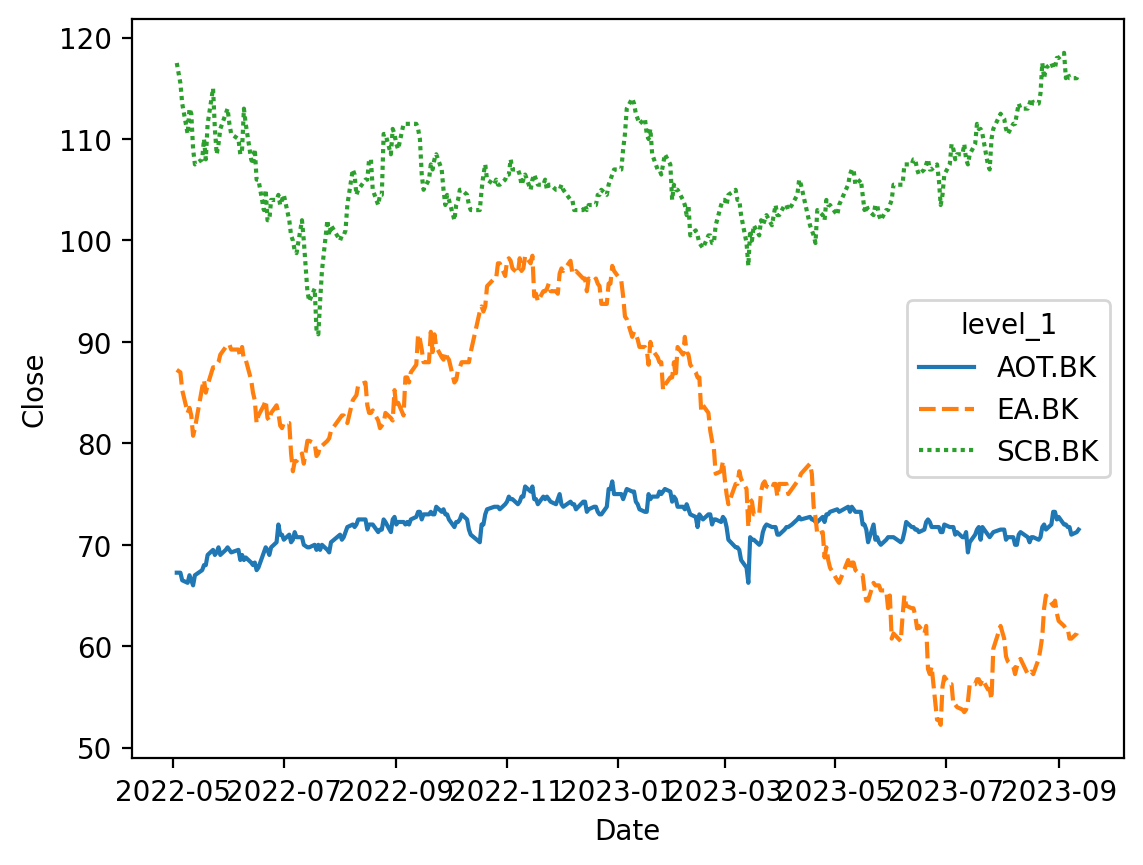

In [31]:
# hue คือ ความแตกต่างของสี
# style คือ รูปแบบเส้นที่ต่างกัน
sns.lineplot(x='Date', y='Close', hue='level_1',
             style='level_1',data=dstack); #ถ้าไม่ใส่เครื่องหมาย ; ด้านหลังจะเกิดอะไรขึ้น??? -> กราฟจะสวยงามขึ้นนิดหน่อย

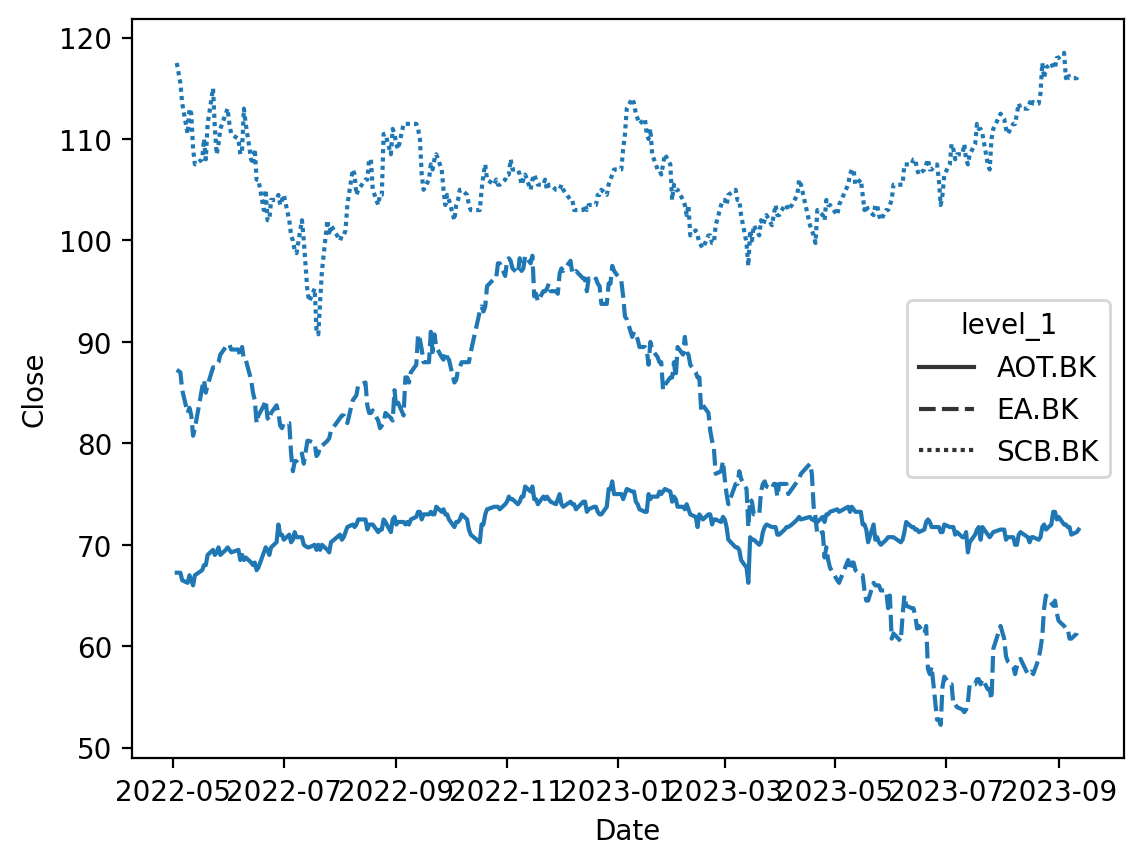

In [30]:
sns.lineplot(x='Date', y='Close', style='level_1',data=dstack); # ตัด hue ออก

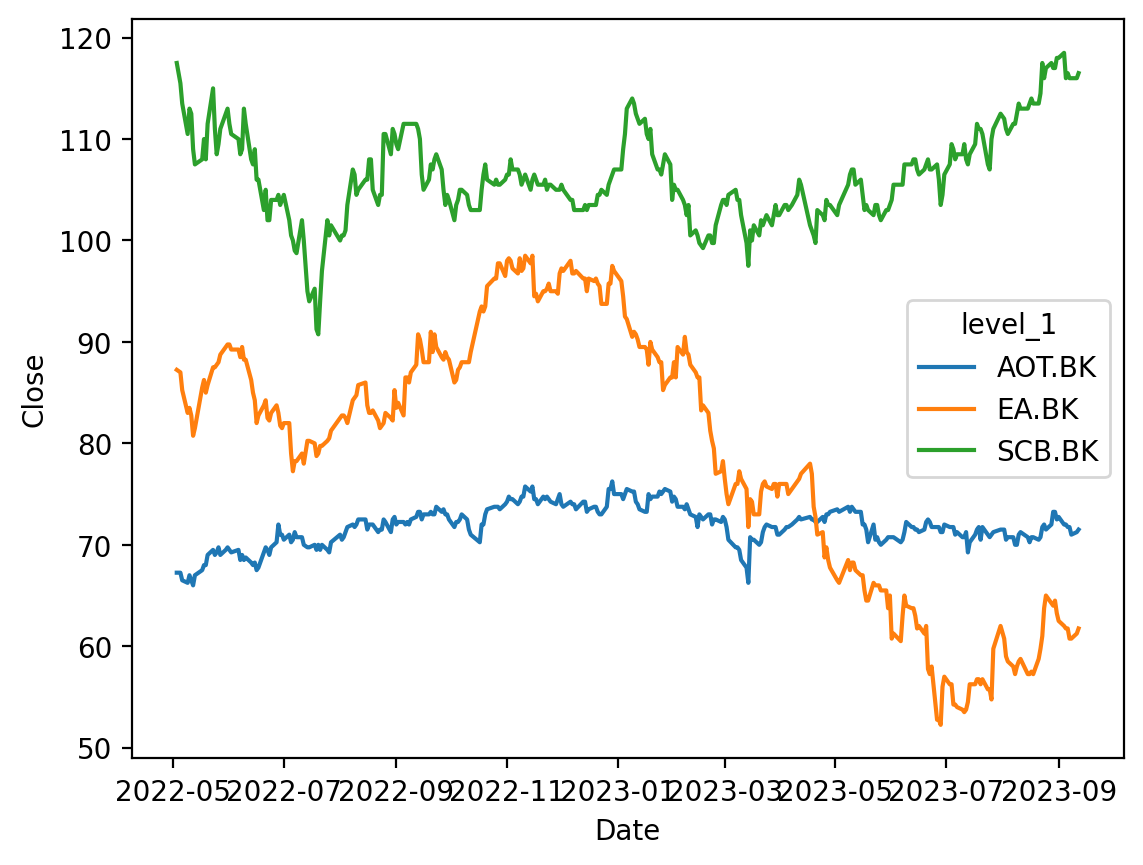

In [29]:
sns.lineplot(x='Date', y='Close', hue='level_1',data=dstack); # ตัด style ออก

<Axes: xlabel='Date', ylabel='Close'>

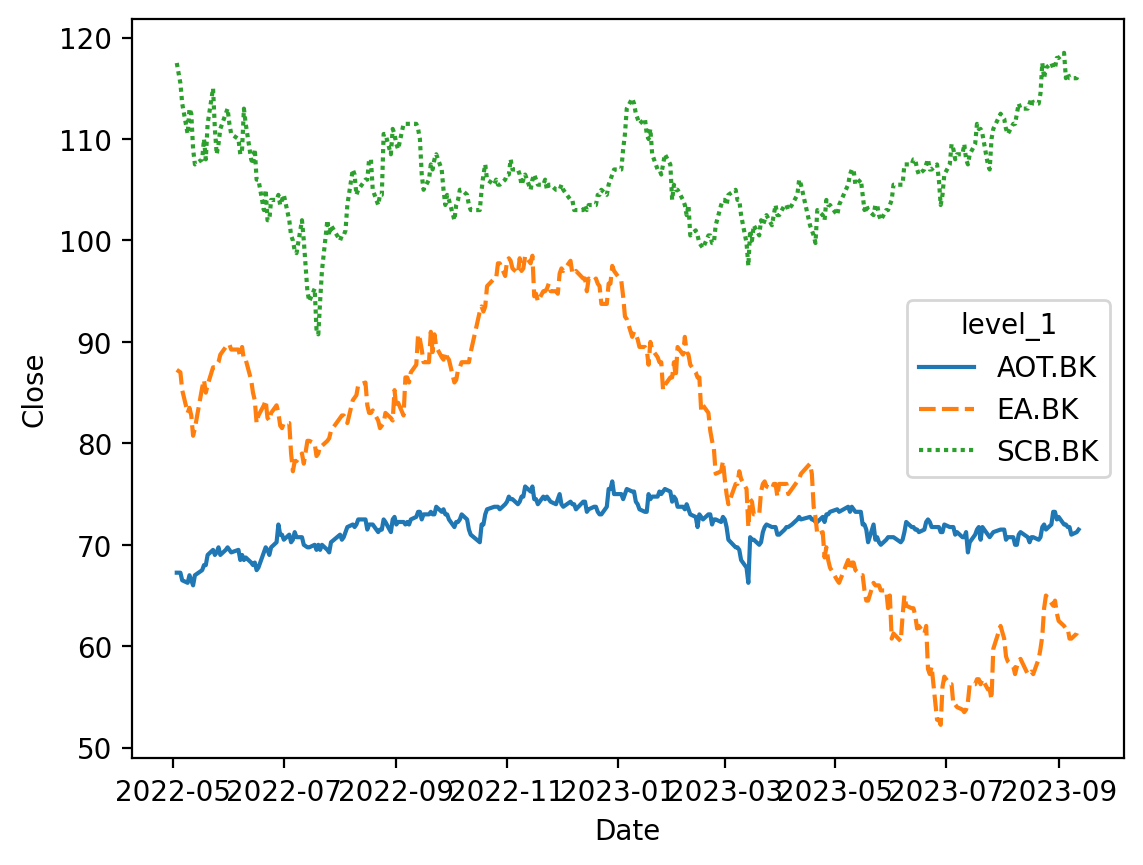

In [32]:
sns.lineplot(x='Date', y='Close', hue='level_1',
             style='level_1',data=dstack)

Relationship plot แสดงกราฟ

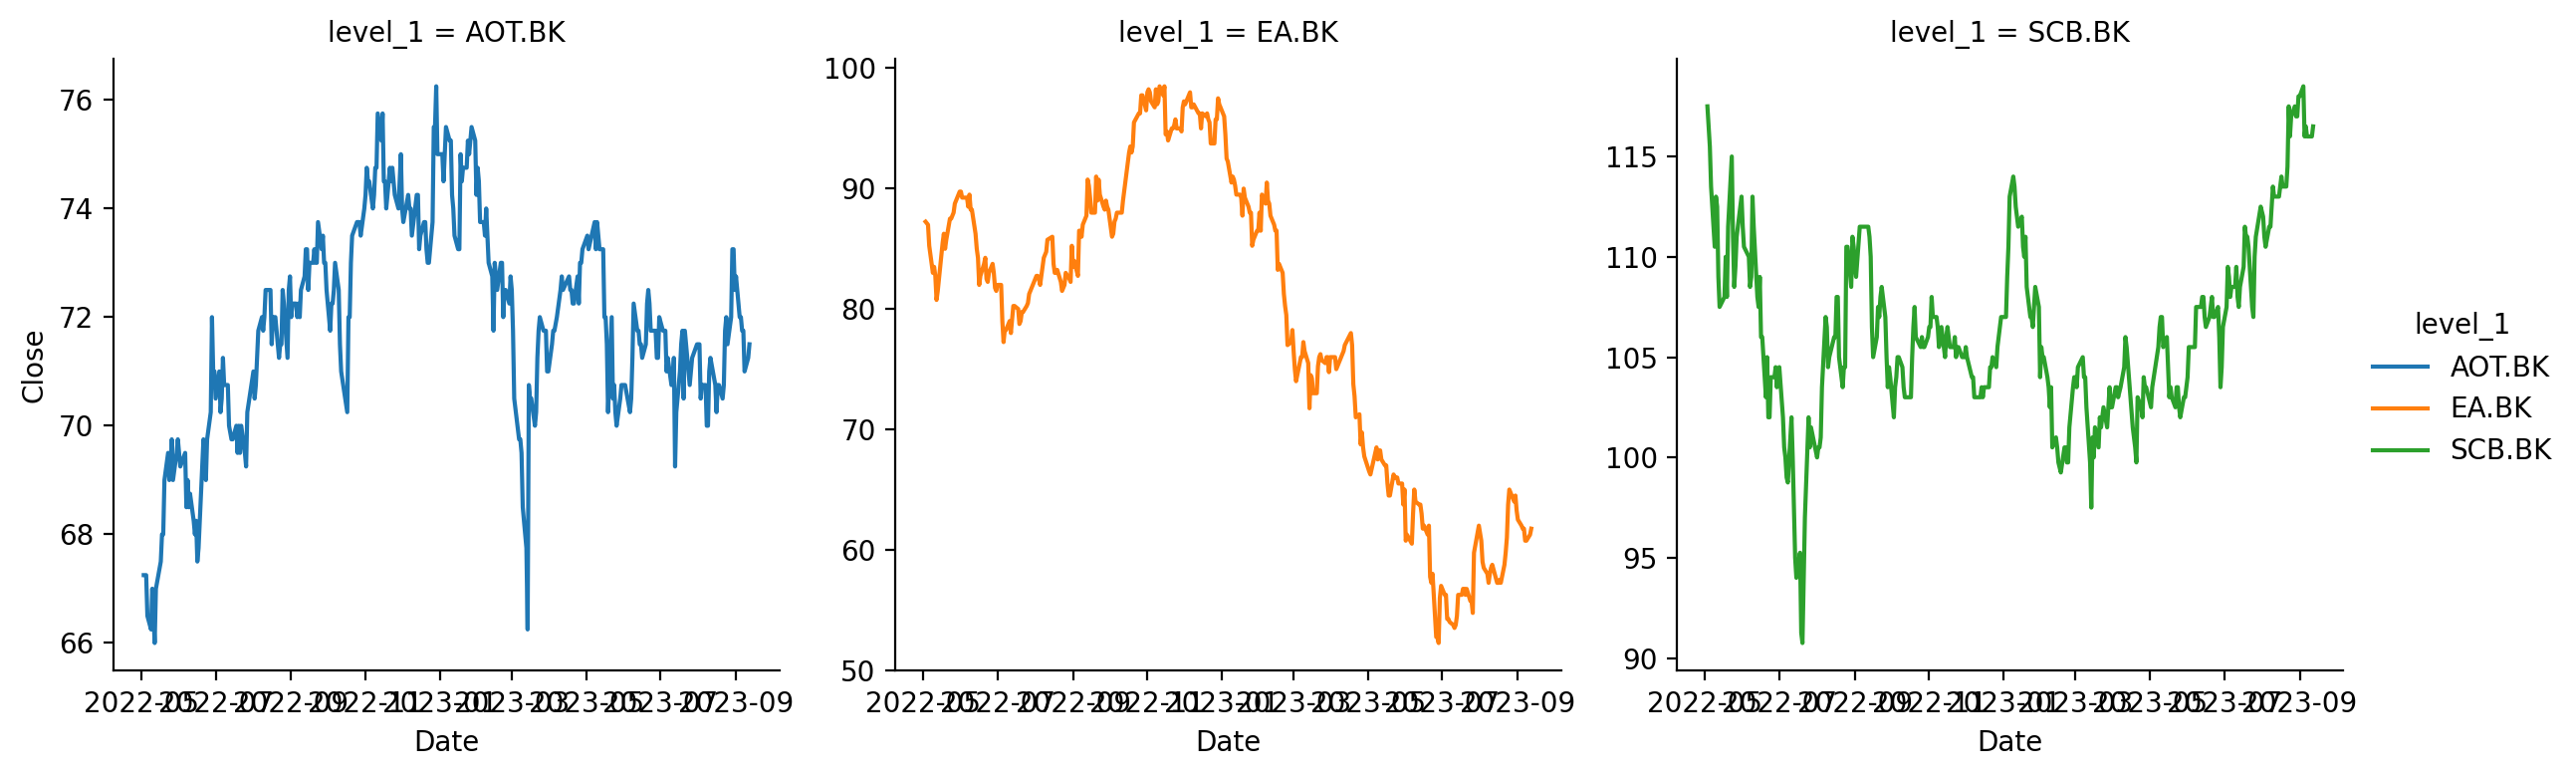

In [33]:
sns.relplot(x='Date', y='Close', col='level_1',
           hue='level_1', kind='line',
           height=4, #ความสูงของกราฟ
           facet_kws={'sharey': False},
           #ปรับ scale ของ y-axis ตามช่วงข้อมูล โดยไม่ share ค่าแกน y ร่วมกัน
           data=dstack);

plot เฉพาะบางหุ้นที่ต้องการ

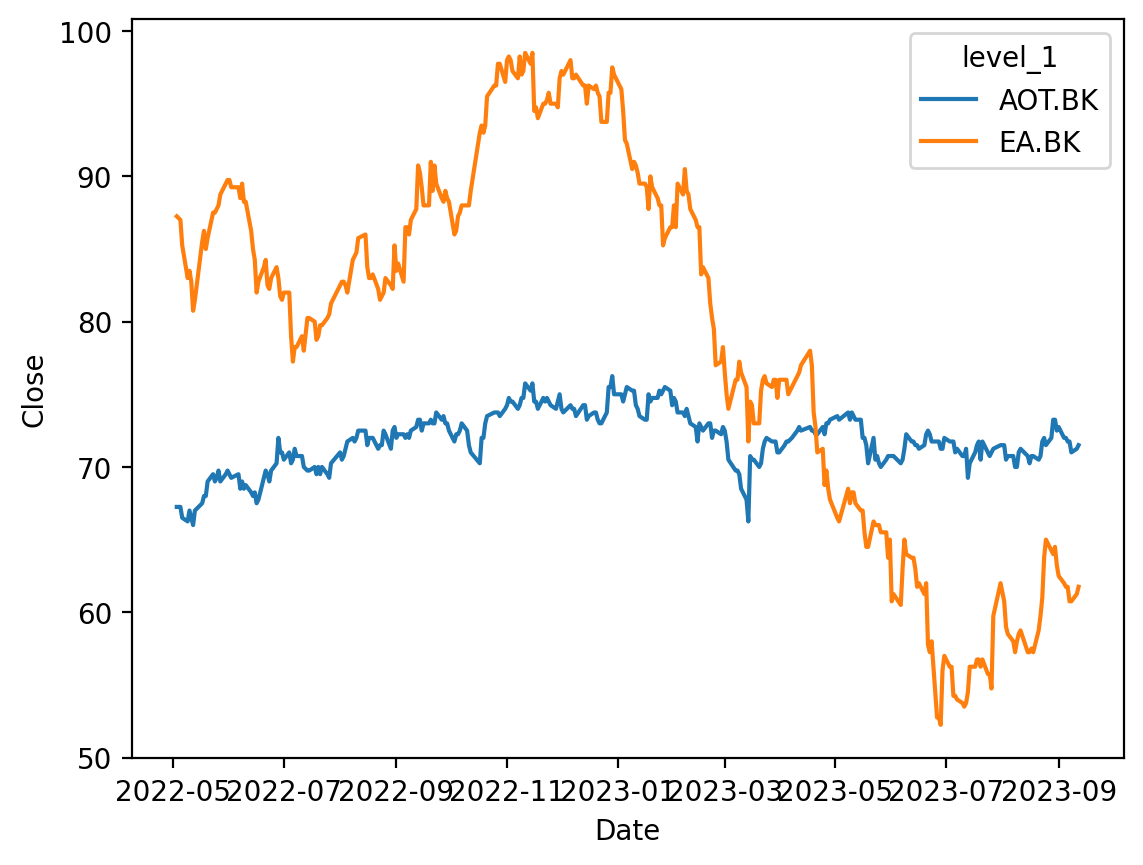

In [35]:
sns.lineplot(x='Date', y='Close',
           hue='level_1',
           data=dstack[dstack.level_1.str.match('EA.BK|AOT.BK')]); # plot เอาแค่ 2 หุ้น

In [36]:
dstack.to_csv('stack_port.csv', index = False)
dstack.to_excel('stack_port.xlsx', index = False)

ดึงข้อมูล stooq

In [37]:
import pandas_datareader.data as web

df = web.get_data_stooq(['^DJI','^SET'])

In [38]:
df

Attributes     Close               High                Low               Open  \
Symbols         ^DJI     ^SET      ^DJI     ^SET      ^DJI     ^SET      ^DJI   
Date                                                                            
2018-09-13  26145.99  1717.96  26191.64  1723.48  26067.08  1690.84  26083.94   
2018-09-14  26154.67  1722.21  26211.11  1727.83  26068.29  1718.11  26169.56   
2018-09-17  26062.12  1718.39  26184.47  1725.03  26030.35  1711.57  26151.66   
2018-09-18  26246.96  1744.42  26317.34  1748.76  26076.21  1716.75  26076.21   
2018-09-19  26405.76  1749.80  26464.41  1762.72  26280.76  1747.47  26287.84   
...              ...      ...       ...      ...       ...      ...       ...   
2023-09-05  34641.97  1547.86  34871.26  1553.93  34635.63  1545.40  34843.22   
2023-09-06  34443.19  1548.78  34611.68  1554.79  34291.56  1542.66  34611.68   
2023-09-07  34500.73  1550.36  34560.86  1556.94  34351.18  1546.43  34351.18   
2023-09-08  34576.59  1547.17  34627.85  1554.50  34473.57  1546.91  34487.41   
2023-09-11  34663.72  1540.94  34784.52  1550.46  34578.59  1535.82  34650.01   

Attributes                Volume                
Symbols        ^SET         ^DJI          ^SET  
Date                                            
2018-09-13  1691.04  260810035.0  5.758506e+09  
2018-09-14  1724.83  228706017.0  3.624871e+09  
2018-09-17  1717.99  230236344.0  3.278277e+09  
2018-09-18  1718.49  242967532.0  5.777693e+09  
2018-09-19  1749.63  251293312.0  8.148672e+09  
...             ...          ...           ...  
2023-09-05  1548.87  286902618.0  5.580970e+09  
2023-09-06  1547.75  309202233.0  5.576228e+09  
2023-09-07  1548.86  392758749.0  3.713779e+09  
2023-09-08  1551.20  296556277.0  4.127318e+09  
2023-09-11  1548.93  295646178.0           NaN  

[1296 rows x 10 columns]

In [39]:
df.tail()

Attributes     Close               High                Low               Open  \
Symbols         ^DJI     ^SET      ^DJI     ^SET      ^DJI     ^SET      ^DJI   
Date                                                                            
2023-09-05  34641.97  1547.86  34871.26  1553.93  34635.63  1545.40  34843.22   
2023-09-06  34443.19  1548.78  34611.68  1554.79  34291.56  1542.66  34611.68   
2023-09-07  34500.73  1550.36  34560.86  1556.94  34351.18  1546.43  34351.18   
2023-09-08  34576.59  1547.17  34627.85  1554.50  34473.57  1546.91  34487.41   
2023-09-11  34663.72  1540.94  34784.52  1550.46  34578.59  1535.82  34650.01   

Attributes                Volume                
Symbols        ^SET         ^DJI          ^SET  
Date                                            
2023-09-05  1548.87  286902618.0  5.580970e+09  
2023-09-06  1547.75  309202233.0  5.576228e+09  
2023-09-07  1548.86  392758749.0  3.713779e+09  
2023-09-08  1551.20  296556277.0  4.127318e+09  
2023-09-11  1548.93  295646178.0           NaN

In [40]:
df.columns

MultiIndex([( 'Close', '^DJI'),
            ( 'Close', '^SET'),
            (  'High', '^DJI'),
            (  'High', '^SET'),
            (   'Low', '^DJI'),
            (   'Low', '^SET'),
            (  'Open', '^DJI'),
            (  'Open', '^SET'),
            ('Volume', '^DJI'),
            ('Volume', '^SET')],
           names=['Attributes', 'Symbols'])

In [41]:
df.columns.get_level_values(0)

Index(['Close', 'Close', 'High', 'High', 'Low', 'Low', 'Open', 'Open',
       'Volume', 'Volume'],
      dtype='object', name='Attributes')

In [42]:
df.columns.get_level_values(1)

Index(['^DJI', '^SET', '^DJI', '^SET', '^DJI', '^SET', '^DJI', '^SET', '^DJI',
       '^SET'],
      dtype='object', name='Symbols')

In [43]:
cols = df.columns.get_level_values(1)+ '_' + df.columns.get_level_values(0)
cols

Index(['^DJI_Close', '^SET_Close', '^DJI_High', '^SET_High', '^DJI_Low',
       '^SET_Low', '^DJI_Open', '^SET_Open', '^DJI_Volume', '^SET_Volume'],
      dtype='object')

In [44]:
cols = cols.str.replace('^','',regex=True)
cols

Index(['DJI_Close', 'SET_Close', 'DJI_High', 'SET_High', 'DJI_Low', 'SET_Low',
       'DJI_Open', 'SET_Open', 'DJI_Volume', 'SET_Volume'],
      dtype='object')

In [45]:
df.columns

MultiIndex([( 'Close', '^DJI'),
            ( 'Close', '^SET'),
            (  'High', '^DJI'),
            (  'High', '^SET'),
            (   'Low', '^DJI'),
            (   'Low', '^SET'),
            (  'Open', '^DJI'),
            (  'Open', '^SET'),
            ('Volume', '^DJI'),
            ('Volume', '^SET')],
           names=['Attributes', 'Symbols'])

In [46]:
df.columns = cols #flatten multi-level columns

In [47]:
df.columns #เหลือ index level เดียว

Index(['DJI_Close', 'SET_Close', 'DJI_High', 'SET_High', 'DJI_Low', 'SET_Low',
       'DJI_Open', 'SET_Open', 'DJI_Volume', 'SET_Volume'],
      dtype='object')

In [48]:
df.tail()

,DJI_Close,SET_Close,DJI_High,SET_High,DJI_Low,SET_Low,DJI_Open,SET_Open,DJI_Volume,SET_Volume
Date,,,,,,,,,,
2023-09-05,34641.97,1547.86,34871.26,1553.93,34635.63,1545.40,34843.22,1548.87,286902618.0,5.580970e+09
2023-09-06,34443.19,1548.78,34611.68,1554.79,34291.56,1542.66,34611.68,1547.75,309202233.0,5.576228e+09
2023-09-07,34500.73,1550.36,34560.86,1556.94,34351.18,1546.43,34351.18,1548.86,392758749.0,3.713779e+09
2023-09-08,34576.59,1547.17,34627.85,1554.50,34473.57,1546.91,34487.41,1551.20,296556277.0,4.127318e+09
2023-09-11,34663.72,1540.94,34784.52,1550.46,34578.59,1535.82,34650.01,1548.93,295646178.0,NaN
